In [1]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [2]:
# probs.detach().numpy().astype(int)

array([[0, 0]])

In [3]:
# import numpy as np

In [4]:
# some_floats = probs.detach().numpy()

In [5]:
# np_array = (np.rint(some_floats)).astype(int)
# prob_list = np_array.tolist()[0]
# prob_list

[1, 0]

In [6]:
import numpy as np
def labels_and_probs_to_answer(label_list, probs):
    
    assert len(label_list) == 2, 'label_list must be of len 2'
    
    
    some_floats = probs.detach().numpy()
    np_array = (np.rint(some_floats)).astype(int)
    prob_list = np_array.tolist()[0]
    
    if prob_list[0]:
        return label_list[0]
    return label_list[1]

# Test

In [23]:
import pandas as pd

In [22]:
from glob import glob
input_path = "image_to_image/macron_db"
filename_list = sorted(glob(input_path+"/*/*", recursive = True))
# filename_list

['image_to_image/macron_db/v2_macron/1670462641.2281039_emmanuel-macron-as-you-dont-say-meme_0.png',
 'image_to_image/macron_db/v2_macron/1670462649.0067163_emmanuel-macron-as-you-dont-say-meme_1.png',
 'image_to_image/macron_db/v2_macron/1670462656.7156446_emmanuel-macron-as-you-dont-say-meme_2.png',
 'image_to_image/macron_db/v2_macron/1670462664.5610595_emmanuel-macron-as-you-dont-say-meme_3.png',
 'image_to_image/macron_db/v2_macron/1670462672.4524941_emmanuel-macron-as-you-dont-say-meme_4.png',
 'image_to_image/macron_db/v2_macron/1670462680.0219746_emmanuel-macron-as-you-dont-say-meme_5.png',
 'image_to_image/macron_db/v2_macron/1670462687.683165_emmanuel-macron-as-you-dont-say-meme_6.png',
 'image_to_image/macron_db/v2_macron/1670462695.3741043_emmanuel-macron-as-you-dont-say-meme_7.png',
 'image_to_image/macron_db/v2_macron/1670462703.0896885_emmanuel-macron-as-you-dont-say-meme_8.png',
 'image_to_image/macron_db/v2_macron/1670462710.8501_emmanuel-macron-as-you-dont-say-meme_9.

In [25]:
macron_db_df = pd.DataFrame(filename_list)
macron_db_df.columns = ['filename']
# macron_db_df

,filename
0,image_to_image/macron_db/v2_macron/1670462641....
1,image_to_image/macron_db/v2_macron/1670462649....
2,image_to_image/macron_db/v2_macron/1670462656....
3,image_to_image/macron_db/v2_macron/1670462664....
4,image_to_image/macron_db/v2_macron/1670462672....
...,...
149,image_to_image/macron_db/v5_macron/1670464618....
150,image_to_image/macron_db/v5_macron/1670464630....
151,image_to_image/macron_db/v5_macron/1670464643....
152,image_to_image/macron_db/v5_macron/1670464655....


In [11]:
# from PIL import Image

# image_list = []
# for curr_filename in filename_list:
#     with Image.open(curr_filename) as im:
#         im = im.convert("RGB")
#         image_list.append(im)

In [41]:
label_list = ["caricature of emmanuel macron", "caricature of a man"]

In [36]:
# inputs = processor(text=label_list, images=image_list[0], return_tensors="pt", padding=True)

# outputs = model(**inputs)
# logits_per_image = outputs.logits_per_image # this is the image-text similarity score
# probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [37]:
# labels_and_probs_to_answer(label_list, probs)

'emmanuel macron'

In [45]:
def from_filename_to_answer(filename, label_list):
    with Image.open(filename) as im:
        im = im.convert("RGB")
        # display(im)
        inputs = processor(text=label_list, images=im, return_tensors="pt", padding=True)

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
    
    return labels_and_probs_to_answer(label_list, probs)

In [66]:
def from_filename_to_bool(filename, label_list):
    with Image.open(filename) as im:
        im = im.convert("RGB")
        # display(im)
        inputs = processor(text=label_list, images=im, return_tensors="pt", padding=True)

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
    
    return labels_and_probs_to_answer(label_list, probs) == label_list[0]

In [46]:
test_filename = macron_db_df.iloc[0]['filename']

In [47]:
from_filename_to_answer(test_filename, label_list)

'caricature of emmanuel macron'

In [65]:
from tqdm.auto import tqdm
tqdm.pandas()

In [48]:
macron_db_df['caricature'] = macron_db_df.progress_apply(lambda row: from_filename_to_answer(row['filename'], label_list), axis=1)

In [67]:
macron_db_df['is_caricature'] = macron_db_df.progress_apply(lambda row: from_filename_to_bool(row['filename'], label_list), axis=1)

  0%|          | 0/154 [00:00<?, ?it/s]

In [71]:
label_list = ["this picture is a meme", "this picture is not a meme"]
macron_db_df['is_meme'] = macron_db_df.progress_apply(lambda row: from_filename_to_bool(row['filename'], label_list), axis=1)

label_list = ["a black and white image", "a color photograph"]
macron_db_df['is_black_and_white_image'] = macron_db_df.progress_apply(lambda row: from_filename_to_bool(row['filename'], label_list), axis=1)

label_list = ["a drawing of a portrait", "a picture of a portrait"]
macron_db_df['is_drawing'] = macron_db_df.progress_apply(lambda row: from_filename_to_bool(row['filename'], label_list), axis=1)

label_list = ["a meme about emmanuel macron", "a meme about you dont say"]
macron_db_df['is_macron_meme'] = macron_db_df.progress_apply(lambda row: from_filename_to_bool(row['filename'], label_list), axis=1)

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

In [81]:
label_list = ["a man with two eyes", "a man missing an eye"]
macron_db_df['has_two_eyes'] = macron_db_df.progress_apply(lambda row: from_filename_to_bool(row['filename'], label_list), axis=1)

label_list = ["a beautiful portrait", "an ugly portrait"]
macron_db_df['is_beautiful_portrait'] = macron_db_df.progress_apply(lambda row: from_filename_to_bool(row['filename'], label_list), axis=1)

label_list = ["looks like a meme", "looks like a random drawing"]
macron_db_df['looks_like_meme'] = macron_db_df.progress_apply(lambda row: from_filename_to_bool(row['filename'], label_list), axis=1)

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

In [72]:
# del macron_db_df['caricature']
macron_db_df

,filename,is_caricature,is_meme,is_black_and_white_image,is_drawing,is_macron_meme
0,image_to_image/macron_db/v2_macron/1670462641....,True,True,True,False,False
1,image_to_image/macron_db/v2_macron/1670462649....,True,True,True,False,False
2,image_to_image/macron_db/v2_macron/1670462656....,True,False,True,False,False
3,image_to_image/macron_db/v2_macron/1670462664....,False,True,True,False,False
4,image_to_image/macron_db/v2_macron/1670462672....,False,True,True,False,False
...,...,...,...,...,...,...
149,image_to_image/macron_db/v5_macron/1670464618....,True,False,True,False,True
150,image_to_image/macron_db/v5_macron/1670464630....,True,False,True,True,False
151,image_to_image/macron_db/v5_macron/1670464643....,True,False,True,False,True
152,image_to_image/macron_db/v5_macron/1670464655....,True,False,True,True,True


In [87]:
macron_db_df.to_csv("macron_db_df.csv", sep=',')

In [85]:
macron_db_df_bestof = macron_db_df[macron_db_df.is_caricature]
# macron_db_df_bestof = macron_db_df_bestof[macron_db_df.is_meme]
macron_db_df_bestof = macron_db_df_bestof[macron_db_df.is_black_and_white_image]
macron_db_df_bestof = macron_db_df_bestof[macron_db_df.is_drawing]
macron_db_df_bestof = macron_db_df_bestof[macron_db_df.is_macron_meme]

macron_db_df_bestof = macron_db_df_bestof[macron_db_df.has_two_eyes]
macron_db_df_bestof = macron_db_df_bestof[macron_db_df.is_beautiful_portrait]
macron_db_df_bestof = macron_db_df_bestof[macron_db_df.looks_like_meme]

macron_db_df_bestof

/tmp/ipykernel_115/630795271.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  macron_db_df_bestof = macron_db_df_bestof[macron_db_df.is_black_and_white_image]
/tmp/ipykernel_115/630795271.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  macron_db_df_bestof = macron_db_df_bestof[macron_db_df.is_drawing]
/tmp/ipykernel_115/630795271.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  macron_db_df_bestof = macron_db_df_bestof[macron_db_df.is_macron_meme]
/tmp/ipykernel_115/630795271.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  macron_db_df_bestof = macron_db_df_bestof[macron_db_df.has_two_eyes]
/tmp/ipykernel_115/630795271.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  macron_db_df_bestof = macron_db_df_bestof[macron_db_df.is_beautiful_portrait]
/tmp/ipykernel_115/630795271.py:9: UserWarning: Boolean Series key wi

,filename,is_caricature,is_meme,is_black_and_white_image,is_drawing,is_macron_meme,has_two_eyes,is_beautiful_portrait,looks_like_meme
5,image_to_image/macron_db/v2_macron/1670462680....,True,True,True,True,True,True,True,True
22,image_to_image/macron_db/v2_macron/1670462832....,True,False,True,True,True,True,True,True
27,image_to_image/macron_db/v2_macron/1670462880....,True,False,True,True,True,True,True,True
30,image_to_image/macron_db/v2_macron/1670462903....,True,True,True,True,True,True,True,True
31,image_to_image/macron_db/v2_macron/1670462911....,True,False,True,True,True,True,True,True
36,image_to_image/macron_db/v2_macron/1670462951....,True,True,True,True,True,True,True,True
39,image_to_image/macron_db/v2_macron/1670462975....,True,False,True,True,True,True,True,True
46,image_to_image/macron_db/v2_macron/1670463036....,True,False,True,True,True,True,True,True
59,image_to_image/macron_db/v2_macron/1670463139....,True,False,True,True,True,True,True,True
64,image_to_image/macron_db/v3_macron/1670463766....,True,False,True,True,True,True,True,True


In [88]:
macron_db_df_bestof.to_csv("macron_db_df_bestof.csv", sep=',')

image_to_image/macron_db/v2_macron/1670462680.0219746_emmanuel-macron-as-you-dont-say-meme_5.png


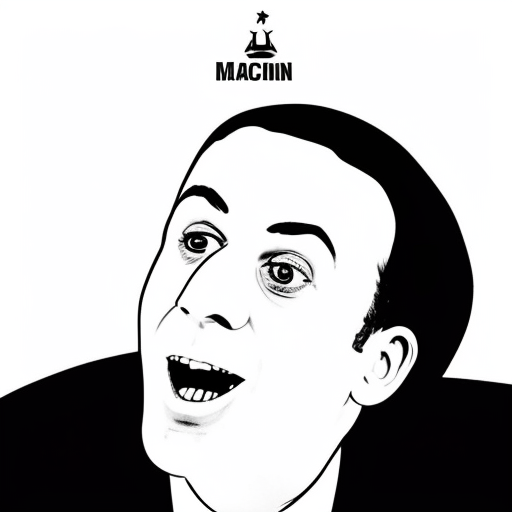

image_to_image/macron_db/v2_macron/1670462832.3424745_emmanuel-macron-portrait_2.png


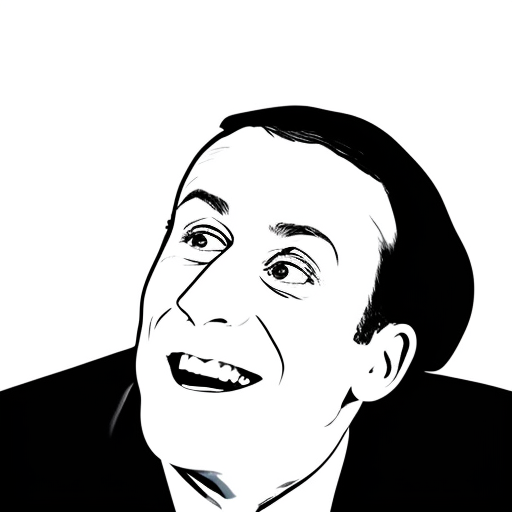

image_to_image/macron_db/v2_macron/1670462880.2703972_emmanuel-macron-portrait_2.png


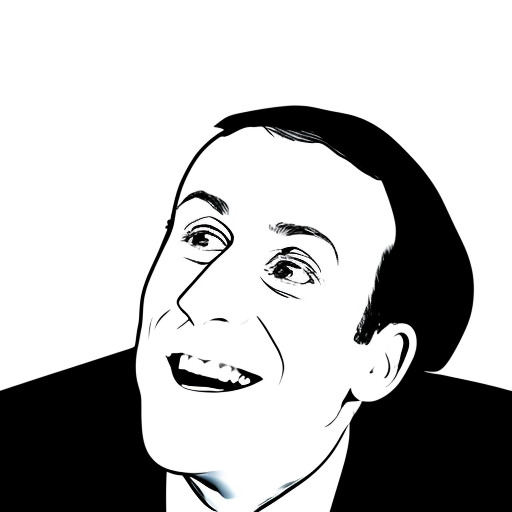

image_to_image/macron_db/v2_macron/1670462903.8052003_emmanuel-macron-portrait_5.png


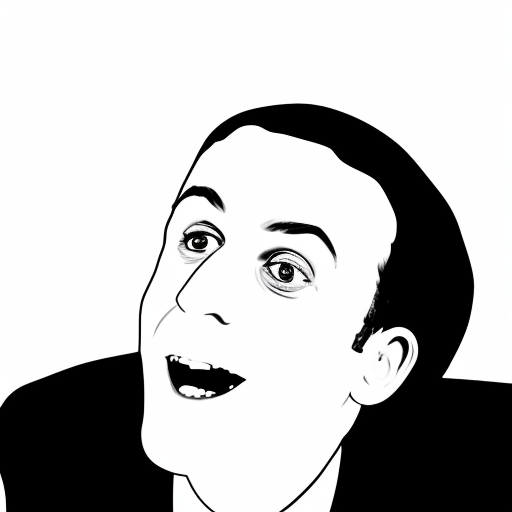

image_to_image/macron_db/v2_macron/1670462911.803833_emmanuel-macron-portrait_6.png


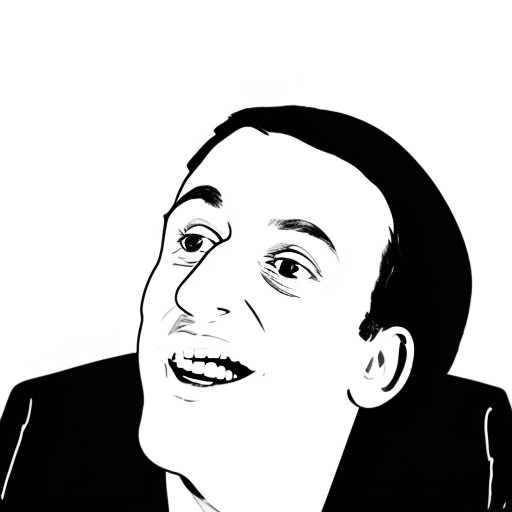

image_to_image/macron_db/v2_macron/1670462951.8899992_emmanuel-macron-portrait_11.png


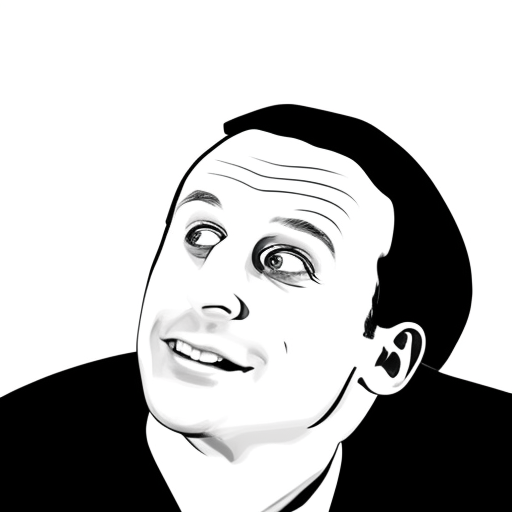

image_to_image/macron_db/v2_macron/1670462975.3384874_emmanuel-macron-portrait_14.png


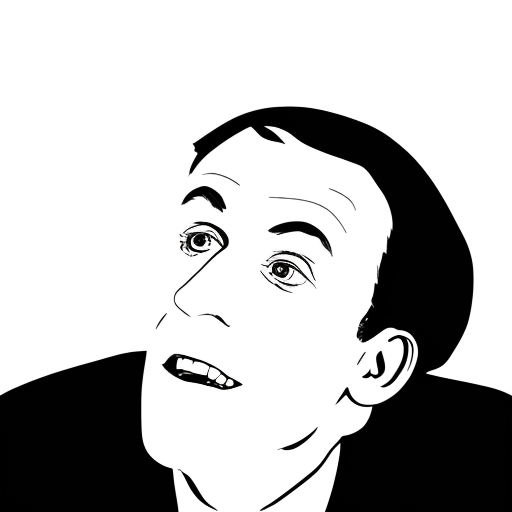

image_to_image/macron_db/v2_macron/1670463036.5534089_black-and-white-caricature-of-emmanuel-macron-portrait_4.png


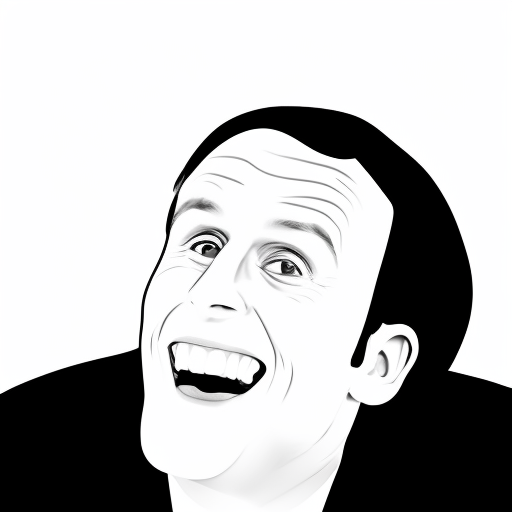

image_to_image/macron_db/v2_macron/1670463139.8027482_black-and-white-caricature-of-emmanuel-macron-portrait_17.png


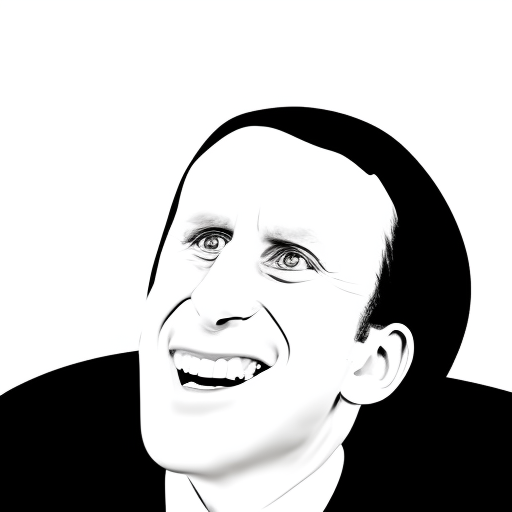

image_to_image/macron_db/v3_macron/1670463766.3296463_zoomed-in-black-and-white-portrait-of-emmanuel-macron_2.png


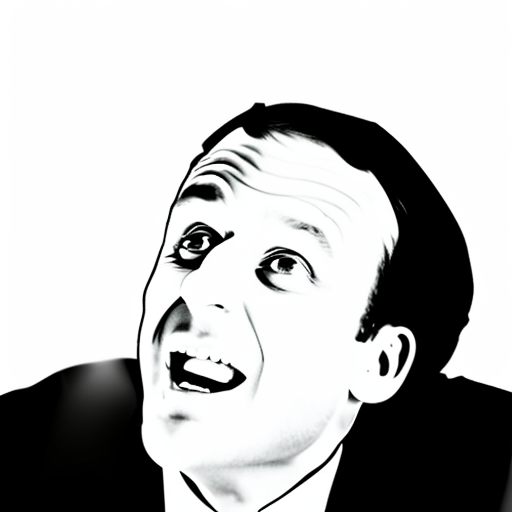

image_to_image/macron_db/v3_macron/1670463782.0242677_zoomed-in-black-and-white-portrait-of-emmanuel-macron_4.png


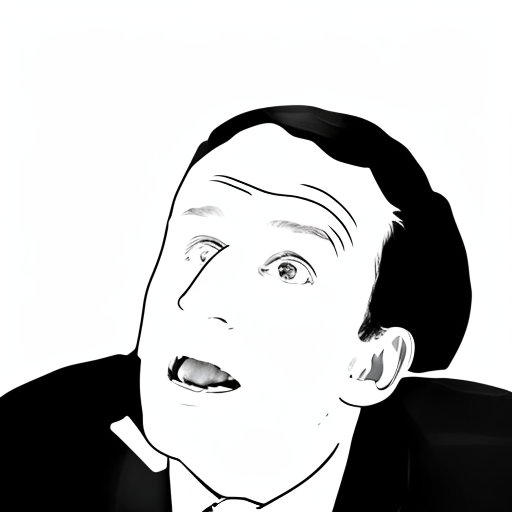

image_to_image/macron_db/v3_macron/1670463820.3607368_zoomed-in-black-and-white-portrait-of-emmanuel-macron_9.png


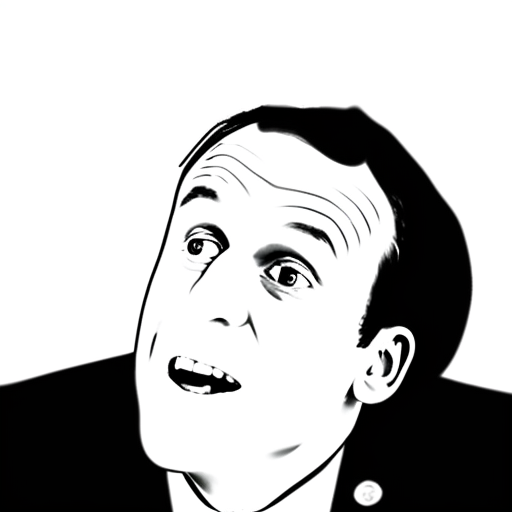

image_to_image/macron_db/v3_macron/1670463874.2009566_zoomed-in-black-and-white-portrait-of-emmanuel-macron_16.png


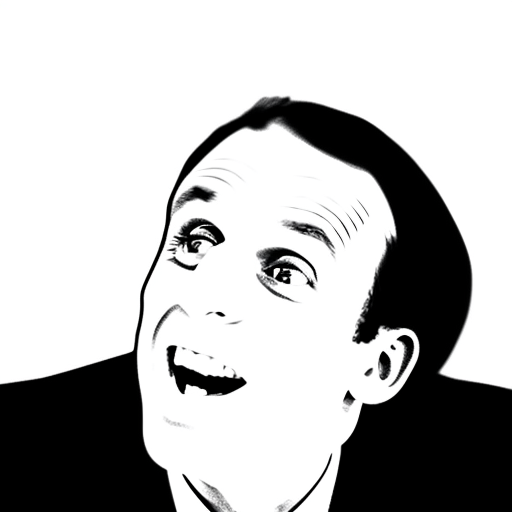

image_to_image/macron_db/v4_macron/1670464123.5305755_zoomed-in-black-and-white-drawn-of-emmanuel-macron-face_18.png


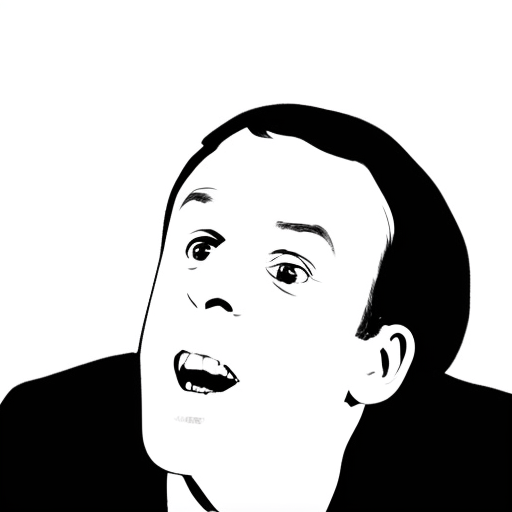

image_to_image/macron_db/v4_macron/1670464131.2919302_zoomed-in-black-and-white-drawn-of-emmanuel-macron-face_19.png


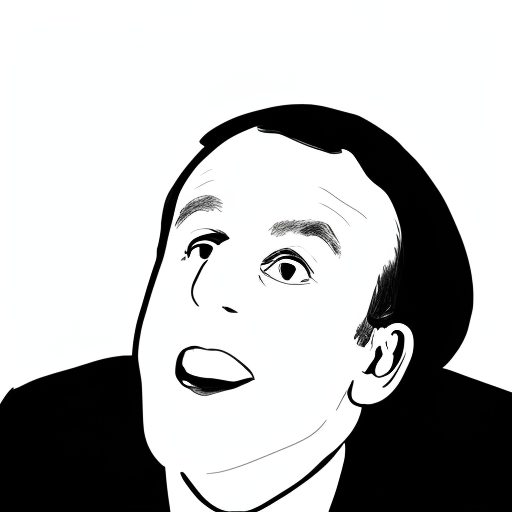

image_to_image/macron_db/v5_macron/1670464436.5996175_zoomed-in-black-and-white-photorealistic-drawing-of-emmanuel-macron-face_0.png


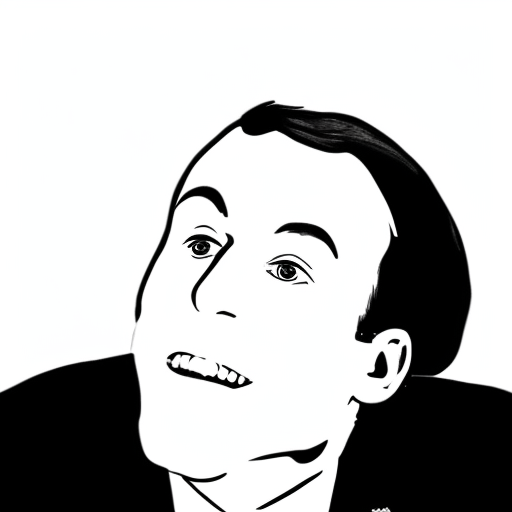

image_to_image/macron_db/v5_macron/1670464448.7488675_zoomed-in-black-and-white-photorealistic-drawing-of-emmanuel-macron-face_1.png


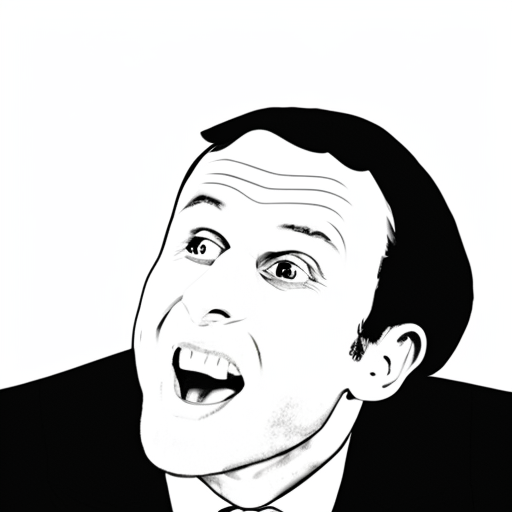

image_to_image/macron_db/v5_macron/1670464533.2740917_zoomed-in-black-and-white-photorealistic-drawing-of-emmanuel-macron-face_8.png


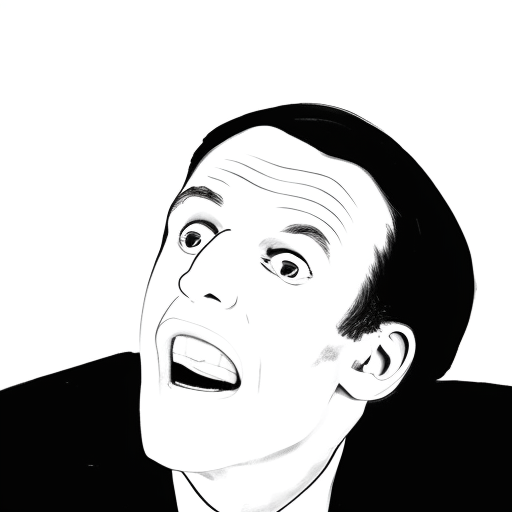

In [86]:
for filename in macron_db_df_bestof['filename']:
     print(filename)
     with Image.open(filename) as im:
        im = im.convert("RGB")
        display(im)